In [1]:
import os

import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons
from sklearn.metrics import accuracy_score, confusion_matrix
from toolz import valmap
from functools import partial
from Ensemble import Ensemble, EnsembleMethods
from LoadData import get_all_datasets_test_train_np_arrays, CurrentDatasets
from Helpers import visualize_confusion_matrix

2023-01-30 21:38:51.400824: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-30 21:38:51.949217: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/felix/miniconda3/envs/tf/lib/
2023-01-30 21:38:51.950345: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/felix/miniconda3/envs/tf/lib/
2023-01-30 21:38:51.950354: W tensorflow/compiler/tf2ten

In [2]:
datasets = get_all_datasets_test_train_np_arrays('../datasets/')

In [3]:
EVALUATION_DATASET = CurrentDatasets.swedish_leaf.value

x_test, y_test = datasets[EVALUATION_DATASET]['test_data']

In [4]:

model_path = f'../models/{EVALUATION_DATASET}'
models_to_load = os.listdir(model_path)
models = dict(zip(list(map(lambda filename: filename.removesuffix('.h5'), models_to_load)),
                  list(map(lambda filename: keras.models.load_model(model_path + "/" + filename), models_to_load))))
models

/home/felix/miniconda3/envs/tf/lib/python3.10/site-packages/keras/layers/core/lambda_layer.py:324: UserWarning: ModelBuilder is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(
2023-01-30 21:30:53.659580: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-30 21:30:53.669217: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-30 21:30:53.669271: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-30 21:30:53.669606: I tensorflow/core/platf

{'Encoder': <keras.engine.functional.Functional at 0x7f4b1dde80a0>,
 'FCN': <keras.engine.sequential.Sequential at 0x7f4b17849bd0>,
 'MCDCNN': <keras.engine.sequential.Sequential at 0x7f4b17849630>,
 'MLP': <keras.engine.sequential.Sequential at 0x7f4b178ed3c0>,
 'Resnet': <keras.engine.functional.Functional at 0x7f4b1dd922c0>,
 'Time_CNN': <keras.engine.sequential.Sequential at 0x7f4b178de7d0>}

20/20 [==============================] - 0s 1ms/step


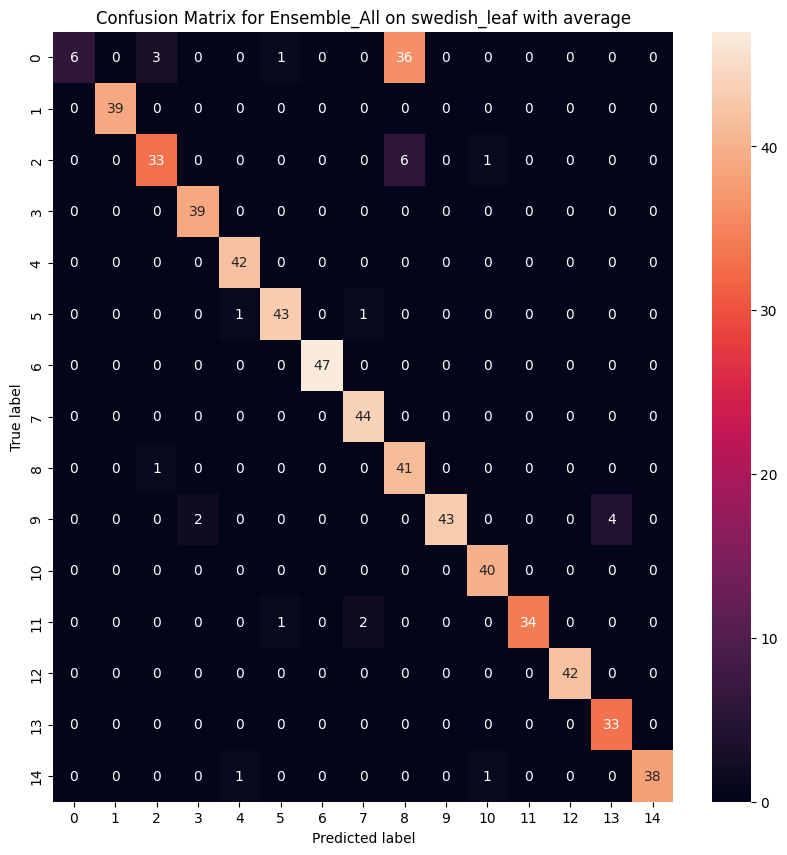

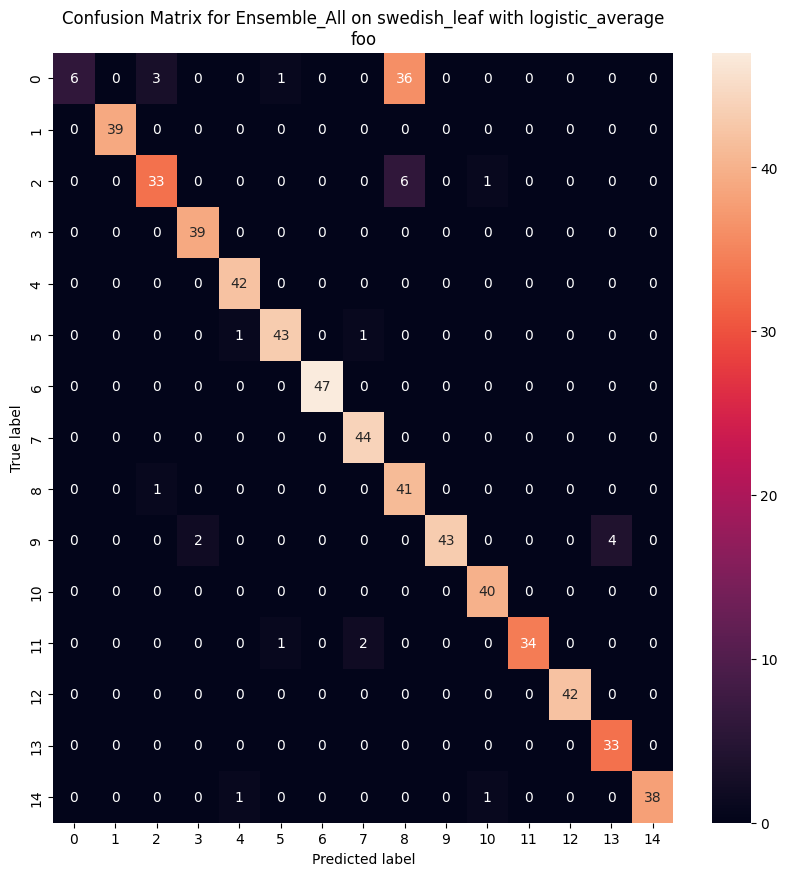

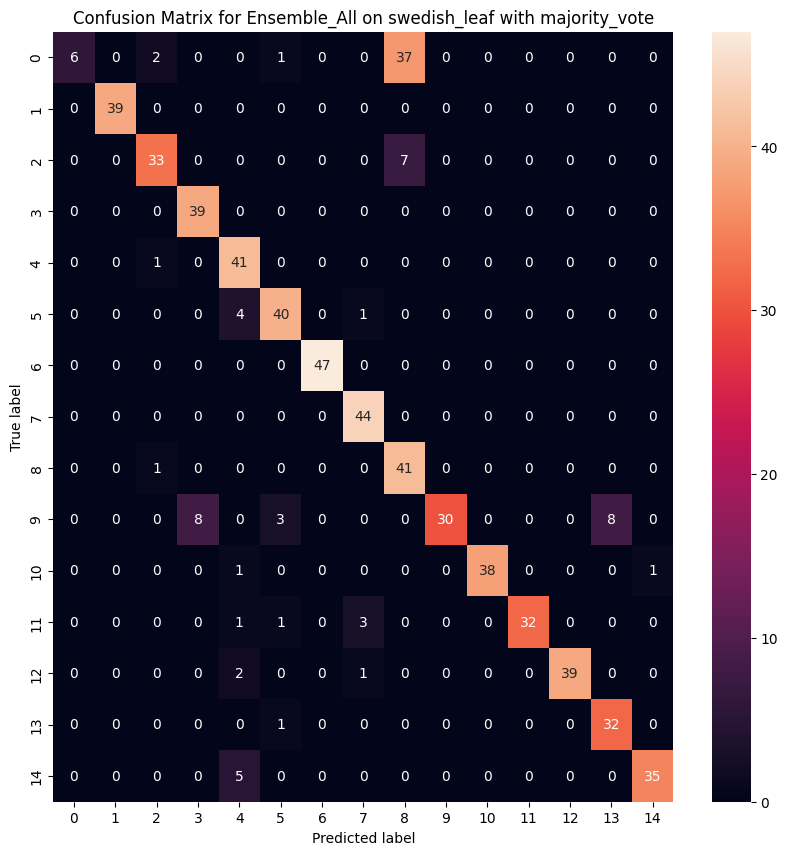

{'average': 0.9024, 'logistic_average': 0.9024, 'majority_vote': 0.8576}

In [7]:



def get_ensemble_predictions(x, models):
    ensemble_methods = ['average', 'logistic_average', 'majority_vote']# TODO: find a better way as [method for method in EnsembleMethods]
    ensembles = dict(zip(ensemble_methods,
                         list(map(lambda ensemble_type: Ensemble(models=list(models.values()), ensemble_type=ensemble_type),
                                  ensemble_methods))))
    return valmap(lambda ensemble: np.array(ensemble.__ensemble_method__(x)),
                  ensembles)

predicted_classes = get_ensemble_predictions(x_test, models)

accuracies = valmap(partial(accuracy_score,y_test), predicted_classes)
confusion_matrices = valmap(partial(confusion_matrix ,y_test), predicted_classes)
visualize_confusion_matrix(confusion_matrices['average'], "Ensemble_All", "swedish_leaf with average")
visualize_confusion_matrix(confusion_matrices['logistic_average'], "Ensemble_All", "swedish_leaf with logistic_average")
visualize_confusion_matrix(confusion_matrices['majority_vote'], "Ensemble_All", "swedish_leaf with majority_vote")
accuracies

In [6]:
y_test

array([ 9, 10,  7, 11, 13,  0,  4, 10, 12,  5,  0, 14,  9,  6,  1,  2,  4,
        8, 13,  5, 14, 10, 10, 12,  5, 14, 14, 12, 12,  7, 13,  3, 10,  1,
        0,  1,  8, 12,  1,  7,  5,  2, 13,  7, 14,  3,  3,  2,  1, 12, 12,
       13, 10, 12,  2,  9,  7, 13,  3,  7, 11,  7, 12,  6,  4,  7, 12,  9,
       11,  9,  8,  2, 10,  5,  8, 13, 13, 11,  2, 12,  7,  7,  0,  7, 13,
       13, 10, 12, 13,  0,  5, 11, 10, 14,  6,  9,  0, 12, 13,  0,  6,  1,
       14, 13,  0, 12,  4, 14, 14,  7,  6,  7,  6,  4,  4,  8,  2, 14,  5,
        9,  2, 10,  7, 12,  6,  5,  8, 13,  1, 10,  1,  4,  6, 10,  1,  3,
        8,  4,  3,  4,  6,  9,  6, 14, 14,  6,  6, 14,  1,  9,  1,  9,  8,
       14,  2,  5,  5,  2,  0,  7,  8,  6, 12,  3,  2,  9, 12,  9,  6,  7,
        3, 13,  8, 11,  8, 14,  5,  4,  1, 13,  0,  5, 14,  3, 12,  8,  2,
        9,  7,  9,  9,  5, 14,  9,  0, 10, 11,  9,  5, 14,  7,  9,  9,  2,
        9,  8,  9,  8,  9,  9,  5,  3,  9,  9,  9,  5,  9,  9,  7,  7,  0,
        9,  2,  9,  9,  8

(None, 128, 1)